In [1]:
from Bagging import create_models, create_bags, evaluate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import random
from BaggingGA import BaggingGA


seed = None
np.random.seed(seed)
random.seed(seed)
data = datasets.load_digits()


X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
def evaluate_bagging_ga(n_trees=5):
    bagging_ga = BaggingGA(X=X_train, y=y_train,
                           n_trees=n_trees, max_iterations=300, mutation_rate=0.0, crossover_rate=0.8,
                           generation_gap=0.2, population_size=50)
    models = bagging_ga.run(X_for_test=X_test, y_for_test=y_test, fun_monitor=fun_monitor)
    accuracy = evaluate(X_test, y_test, models=models)
    return accuracy


fit_acc_sum = {}

def fun_monitor(iteration, best_fitness, fitness_pointer, accuracy):
    print(f"Iteration {iteration}, Best fitness: {best_fitness:.3f}, Fitness: {fitness_pointer:.3f}, Accuracy: {accuracy:.3f}")
    if iteration not in fit_acc_sum:
        fit_acc_sum[fitness_pointer] = [accuracy]
    else:
        fit_acc_sum[fitness_pointer].append(accuracy)

acc_ga = evaluate_bagging_ga(n_trees=5)
print(f"BaggingGA: {acc_ga:.2f}")

Iteration 0, Best fitness: 0.486, Fitness: 0.486, Accuracy: 0.819
Iteration 1, Best fitness: 0.486, Fitness: 0.486, Accuracy: 0.814
Iteration 2, Best fitness: 0.503, Fitness: 0.503, Accuracy: 0.819
Iteration 3, Best fitness: 0.510, Fitness: 0.510, Accuracy: 0.844
Iteration 4, Best fitness: 0.528, Fitness: 0.528, Accuracy: 0.858
Iteration 5, Best fitness: 0.528, Fitness: 0.507, Accuracy: 0.839
Iteration 6, Best fitness: 0.528, Fitness: 0.493, Accuracy: 0.861
Iteration 7, Best fitness: 0.528, Fitness: 0.490, Accuracy: 0.781
Iteration 8, Best fitness: 0.528, Fitness: 0.479, Accuracy: 0.842
Iteration 9, Best fitness: 0.528, Fitness: 0.479, Accuracy: 0.817
Iteration 10, Best fitness: 0.528, Fitness: 0.476, Accuracy: 0.797
Iteration 11, Best fitness: 0.528, Fitness: 0.479, Accuracy: 0.811
Iteration 12, Best fitness: 0.528, Fitness: 0.493, Accuracy: 0.833
Iteration 13, Best fitness: 0.528, Fitness: 0.503, Accuracy: 0.847
Iteration 14, Best fitness: 0.528, Fitness: 0.517, Accuracy: 0.819
Itera

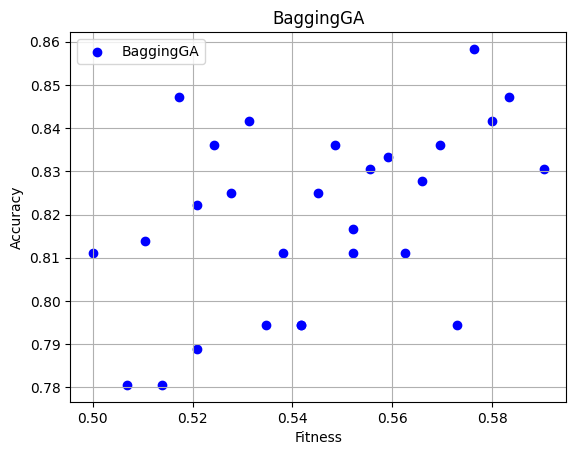

In [ ]:
import matplotlib.pyplot as plt

X = fit_acc_sum.keys()
Y = [np.mean(fit_acc_sum[x]) for x in X]
Y_std = [np.std(fit_acc_sum[x]) for x in X]
plt.scatter(X, Y, label="BaggingGA", color="blue")
# plt.fill_between(X, np.array(Y) - np.array(Y_std), np.array(Y) + np.array(Y_std), alpha=0.2)
plt.xlabel("Fitness")
plt.ylabel("Accuracy")
plt.title("BaggingGA")
plt.grid()
plt.legend()
plt.show()
